# **Business Case: Jamboree Education - Linear Regression**

## **About Jamboree**

Jamboree is a renowned **educational institution** that has successfully assisted numerous students in gaining admission to top colleges abroad. With their proven problem-solving methods, they have helped students achieve exceptional scores on exams like **GMAT**, **GRE**, and **SAT** with minimal effort.

## **Business Problem**

To support students, Jamboree has recently introduced a new feature on their
website. This feature enables students to assess their probability of admission to Ivy League colleges, considering the unique perspective of Indian applicants.

Our task is to:

1. Analyse the available data to **find out crucial factors** about the students which are impacting graduate admissions into Ivy League colleges, and **interrelationship** of those factors with one another.

2. Develop a **predictive Model** to determine an individual's admission chances given the rest of the variables.


# **1. Exploratory Data Analysis.**

In [283]:
#Importing basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [284]:
#Loading data as pandas dataframe
!wget --no-check-certificate https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv -O Jamboree_Admission.csv
df = pd.read_csv("Jamboree_Admission.csv")

--2024-09-14 12:58:30--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.64.229.135, 18.64.229.172, 18.64.229.71, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.64.229.135|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16176 (16K) [text/plain]
Saving to: ‘Jamboree_Admission.csv’

Jamboree_Admission. 100%[===================>]  15.80K  --.-KB/s    in 0.001s  

2024-09-14 12:58:31 (20.3 MB/s) - ‘Jamboree_Admission.csv’ saved [16176/16176]



In [285]:
##dataframe
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [286]:
#columns
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

### **Column Description**

1. **Serial No.**: This column represents the unique row identifier for each applicant in the dataset.
2. **GRE Scores**: This column contains the GRE (Graduate Record Examination) scores of the applicants, which are measured on a scale of 0 to 340.
3. **TOEFL Scores**: This column includes the TOEFL (Test of English as a Foreign Language) scores of the applicants, which are measured on a scale of 0 to 120.
4. **University Rating**: This column indicates the rating or reputation of the university that the applicants are associated with. The rating is based on a scale of 0 to 5, with 5 representing the highest rating.
5. **SOP**: This column represents the strength of the applicant's statement of purpose, rated on a scale of 0 to 5, with 5 indicating a strong and compelling SOP.
6. **LOR**: This column represents the strength of the applicant's letter of recommendation, rated on a scale of 0 to 5, with 5 indicating a strong and compelling LOR.
7. **CGPA**: This column contains the undergraduate Grade Point Average (GPA) of the applicants, which is measured on a scale of 0 to 10.
8. **Research**: This column indicates whether the applicant has research experience (1) or not (0).
9. **Chance of Admit**: This column represents the estimated probability or chance of admission for each applicant, ranging from 0 to 1.

In [287]:
# Dropping the “Serial No.” column as it is not relevant for our prediction.
df.drop("Serial No.", axis = 1, inplace=True)

In [288]:
#Remaining two columns to remove extra space at end
df.rename(columns={"LOR ":"LOR", "Chance of Admit ":"Chance of Admit"}, inplace = True)

In [289]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [290]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [291]:
#shape of the dataset
df.shape

(500, 8)

In [292]:
#data type of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [293]:
#Number of unique values for each column
for i in df.columns:
  print(i,":",df[i].nunique())

GRE Score : 49
TOEFL Score : 29
University Rating : 5
SOP : 9
LOR : 9
CGPA : 184
Research : 2
Chance of Admit : 61


In [294]:
#statistical summary
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [295]:
#missing value detection
df.isna().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


### **Observations:**

1. The data had a unique row Identifier column “**Serial No.**” which was **dropped** so that model does not builds some understanding based on row numbers.
2. There are **500 rows** and **8 columns** in the data.
3. All columns have numerical (int/float) data type.
4. Columns 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA' and 'Research' are **variables** which will be use to train the model to predict our **Target** column that is 'Chance of Admit'.
5. There is **no missing value** in the dataset.


## **Outlier detection.**

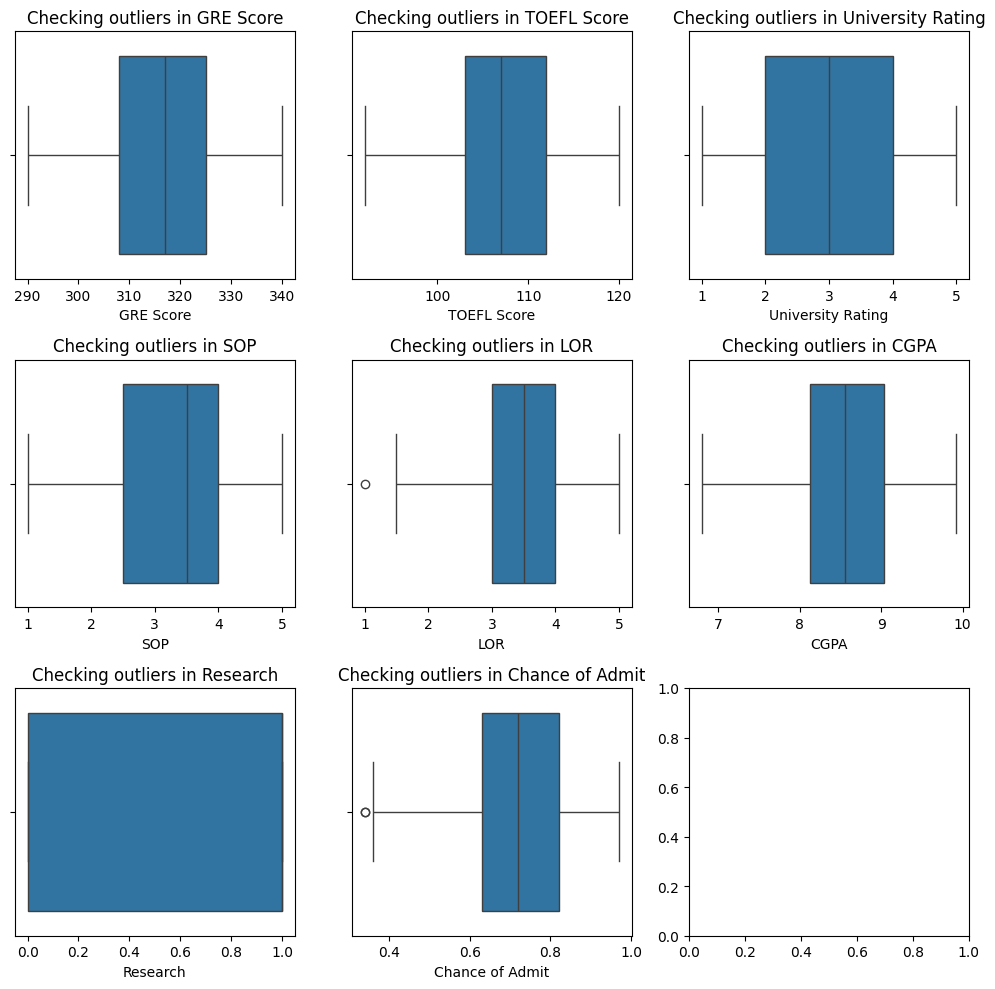

In [296]:
#Outliers visualisation using Boxplots
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()
for i, ele in enumerate(df.columns):
    sns.boxplot(x=df[ele], ax=axes[i])
    axes[i].set_title(f"Checking outliers in {ele}")

plt.tight_layout()
plt.show()

### **Observation:**

There are almost **no outliers** present in the given dataset.
Outlier treatment is not necessary in the given case.


## **Univariate Analysis.**

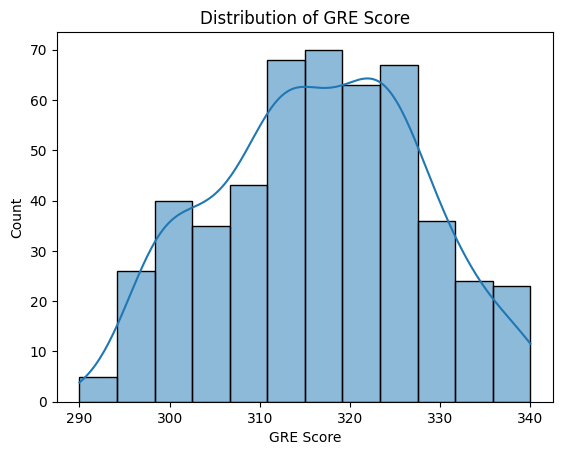

In [297]:
#GRE Score
sns.histplot(df["GRE Score"], kde=True)
plt.title("Distribution of GRE Score")
plt.show()

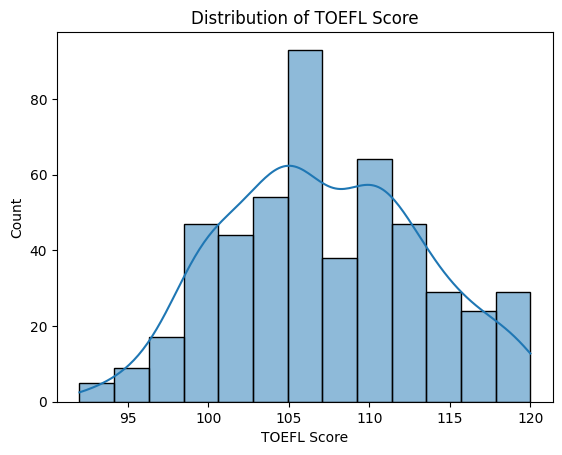

In [298]:
#TOEFL (Test of English as a Foreign Language) scores
sns.histplot(df["TOEFL Score"], kde=True)
plt.title("Distribution of TOEFL Score")
plt.show()


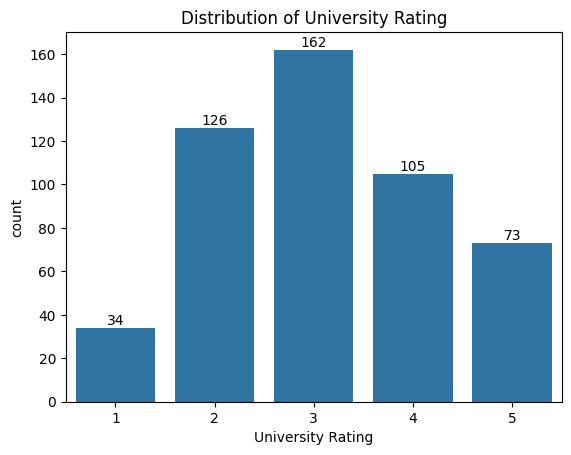

In [299]:
#University Rating
ax=sns.countplot(x=df["University Rating"])
ax.bar_label(ax.containers[0])
plt.title("Distribution of University Rating")
plt.show()

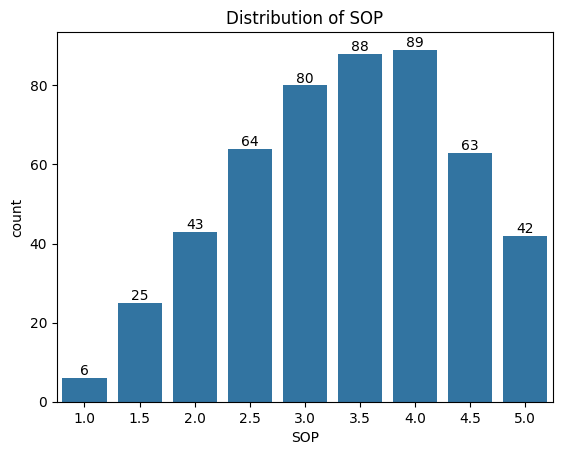

In [300]:
#SOP - strength of the applicant's "Statement Of Purpose"
ax=sns.countplot(x=df["SOP"])
ax.bar_label(ax.containers[0])
plt.title("Distribution of SOP")
plt.show()

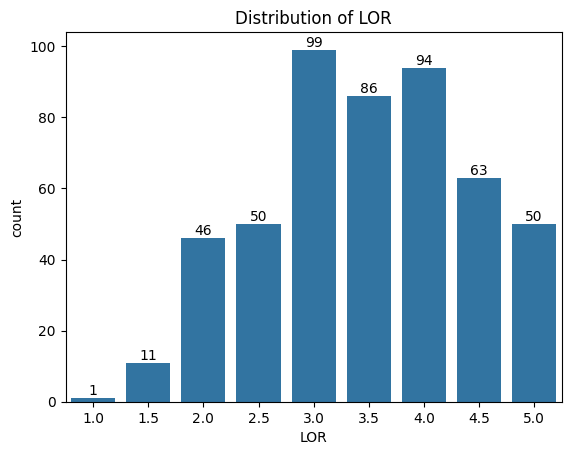

In [301]:
# LOR - strength of the applicant's Letter Of Recommendation
ax=sns.countplot(x=df["LOR"])
ax.bar_label(ax.containers[0])
plt.title("Distribution of LOR")
plt.show()

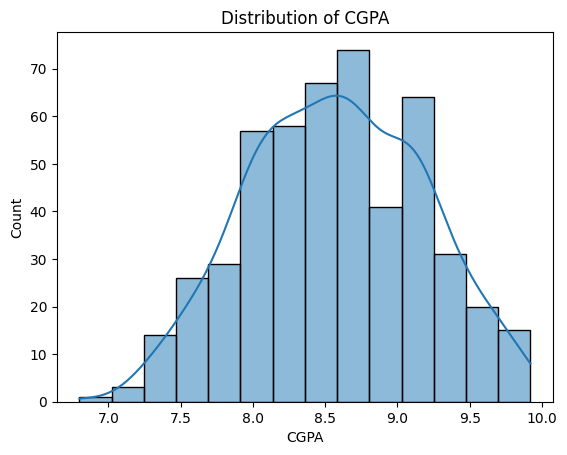

In [302]:
#CGPA
sns.histplot(df["CGPA"], kde=True)
plt.title("Distribution of CGPA")
plt.show()

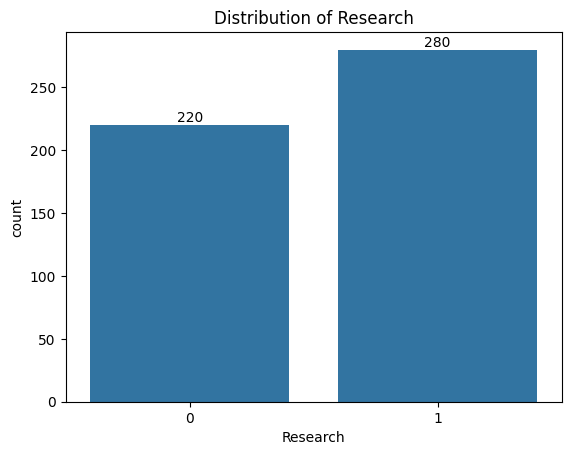

In [303]:
# Research - research experience (1) or not (0).
ax=sns.countplot(x=df["Research"])
ax.bar_label(ax.containers[0])
plt.title("Distribution of Research")
plt.show()

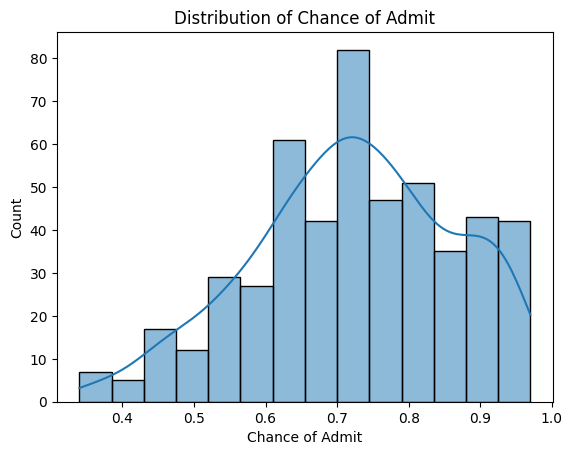

In [304]:
#Chance of Admit
sns.histplot(df["Chance of Admit"], kde=True)
plt.title("Distribution of Chance of Admit")
plt.show()

### **Observation:**

1. The distribution of values across all the columns appears to follow **Normal** Distribution with most observations concentrated around the mean value and comparatively lesser observations towards the both extreme ends. Even the **categorical** values like “University Ranking”, SOP and LOR follows the similar pattern.

2. The number of applicants with research experience is slightly more than the number of applicants without research experience.


## **Bivariate Analysis.**

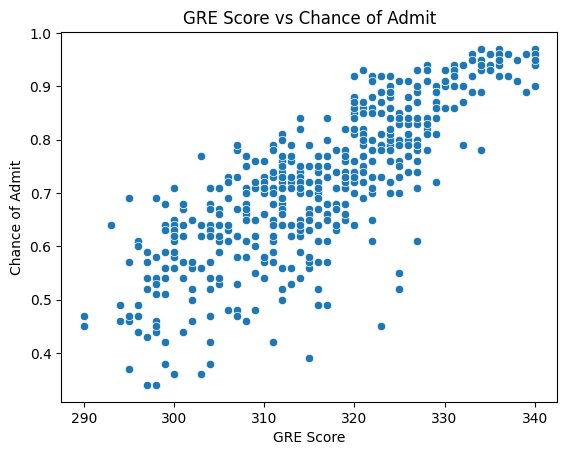

In [305]:
#"GRE Score" vs "Chance of Admit"
sns.scatterplot(x=df["GRE Score"], y=df["Chance of Admit"])
plt.title("GRE Score vs Chance of Admit")
plt.show()

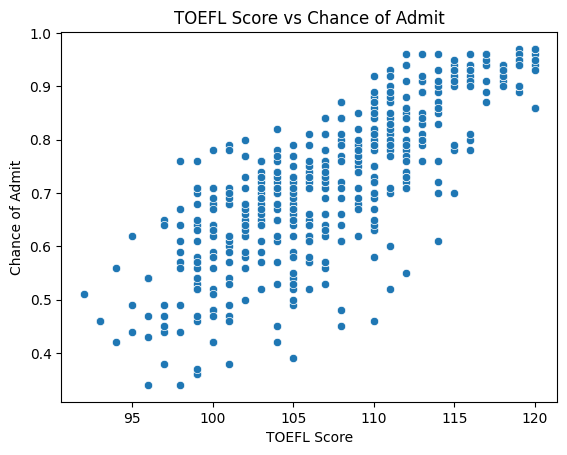

In [306]:
#"TOEFL Score	" vs "Chance of Admit"
sns.scatterplot(x=df["TOEFL Score"], y=df["Chance of Admit"])
plt.title("TOEFL Score vs Chance of Admit")
plt.show()

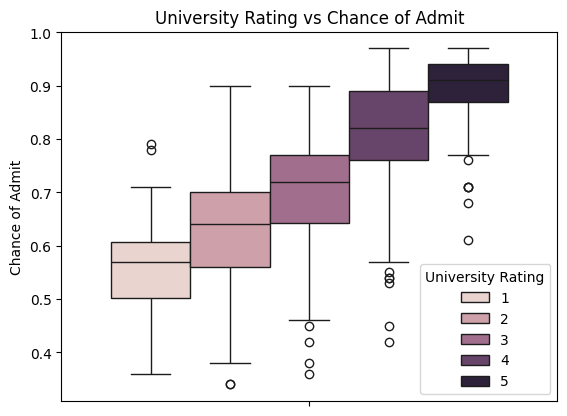

In [307]:
#"University Rating" vs "Chance of Admit"
ax=sns.boxplot(y=df["Chance of Admit"], hue = df["University Rating"])
plt.title("University Rating vs Chance of Admit")
plt.show()

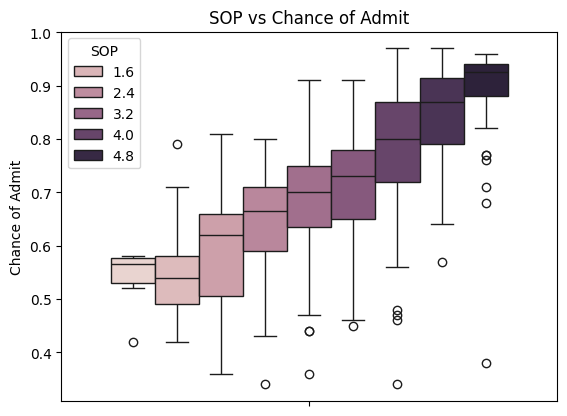

In [308]:
#"SOP" vs "Chance of Admit"
ax=sns.boxplot(y=df["Chance of Admit"], hue = df["SOP"])
plt.title("SOP vs Chance of Admit")
plt.show()

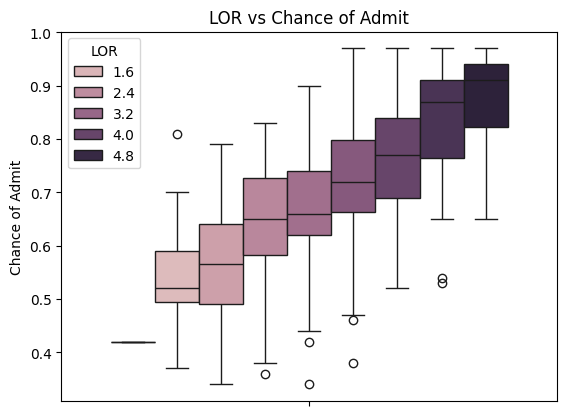

In [309]:
#"LOR" vs "Chance of Admit"
ax=sns.boxplot(y=df["Chance of Admit"], hue = df["LOR"])
plt.title("LOR vs Chance of Admit")
plt.show()

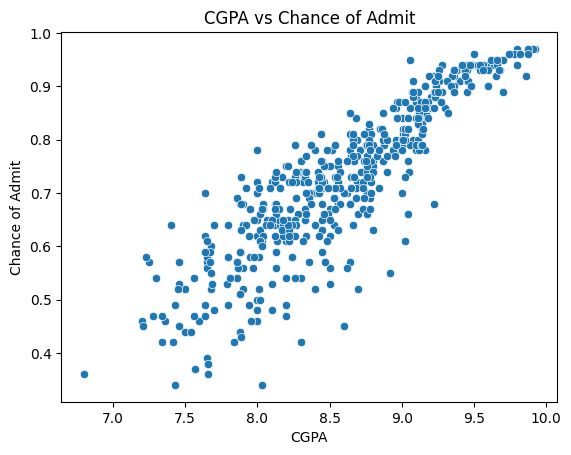

In [310]:
#"CGPA" vs "Chance of Admit"
sns.scatterplot(x=df["CGPA"], y=df["Chance of Admit"])
plt.title("CGPA vs Chance of Admit")
plt.show()

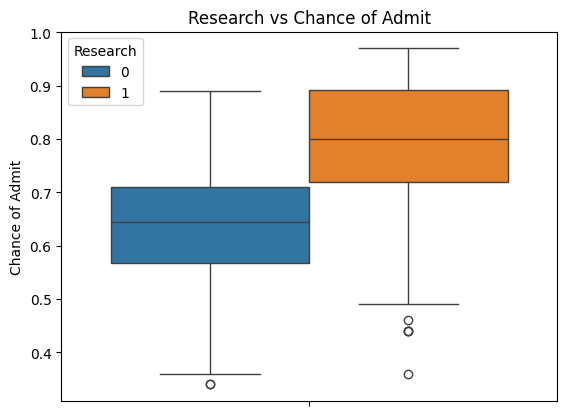

In [311]:
#"Research" vs "Chance of Admit"
ax=sns.boxplot(y=df["Chance of Admit"], hue = df["Research"])
plt.title("Research vs Chance of Admit")
plt.show()

### **Observation:**

1. Although with varying degree in general there appears to be a linear **positive corelation** between 'GRE Score', 'TOEFL Score' and 'CGPA' with 'Chance of Admit'.

2. In general, higher value of 'University Rating', 'SOP' and 'LOR' results in **higher probability** of getting admission.

3. Mean value of 'Chance of Admit' is higher for applicants having research experience indicating having research experience will **increase** your probability if getting admission into Ivy League colleges.


## **Checking Correlation between Variables.**

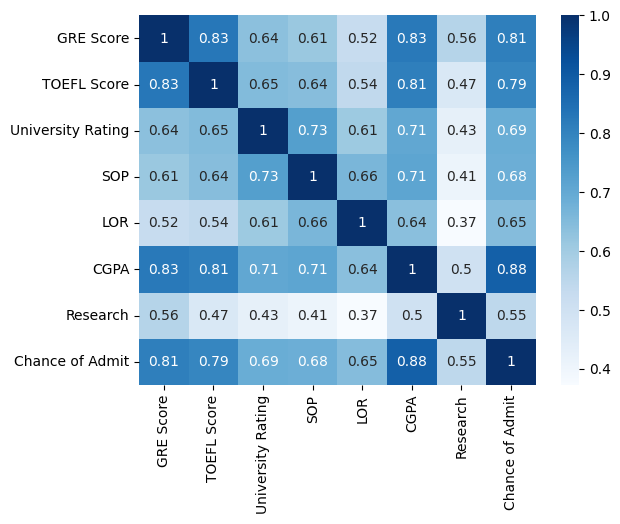

In [312]:
#Plotting Correlation Heatmap
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.show()

## **Observation:**

1. All independent variable has some sort of **positive Correlation** with each other and the dependent variable.

2. **No** variable has very high correlation (**>0.90**) with any other variable.


### The distribution of **independent variables** ('GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA' and 'Research') and their relationship with the **dependent variable** ('Chance of Admit') shows that **Linear Regression Model** can be a good choice to build a prediction model.

## **2. Preparing the data for modeling.**

In [313]:
# Sepataring Features (X) and Target (y)
y = df['Chance of Admit']
X = df.drop('Chance of Admit', axis=1)
y.shape, X.shape

((500,), (500, 7))

In [314]:
#Splitting Data into Train and Test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [315]:
X_train.shape, y_train.shape

((400, 7), (400,))

In [316]:
X_test.shape, y_test.shape

((100, 7), (100,))

In [317]:
# Scaling the Data. I am choosing MinMaxScaler as it will transform data in the same scale as target (y) i.e between 0-1

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fitting and transforming Train data.

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

# Only transforming Test data using the same parameter of Train data. This we are doing to simulate the real world senario where we won't know the distribution of query point.

X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)


In [318]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.76,0.642857,0.75,1.000,0.714286,0.750000,1.0
1,1.00,0.821429,1.00,0.875,0.857143,0.849359,1.0
2,0.44,0.392857,0.50,0.625,0.714286,0.634615,0.0
3,0.12,0.250000,0.25,0.500,0.571429,0.153846,0.0
4,0.66,0.750000,0.50,0.750,0.428571,0.807692,1.0


In [319]:
X_test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.547619,0.692308,0.50,0.500,0.875,0.641791,1.0
1,0.428571,0.615385,0.50,0.750,0.875,0.578358,1.0
2,0.619048,0.730769,0.75,0.875,0.750,0.582090,0.0
3,0.690476,0.384615,1.00,0.500,0.625,0.600746,1.0
4,0.023810,0.000000,0.00,0.000,0.000,0.041045,0.0


# **3. Model building**

### **Using sklearn**
Lets first build model using Sklearn Library.

In [320]:
#Importing Library and training the Model.
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [321]:
# Model coefficients
model.coef_

array([0.09577254, 0.05784294, 0.03304084, 0.0138066 , 0.05943593,
       0.38343794, 0.02317254])

In [322]:
#Model Intercept
model.intercept_

0.34716653007751835

In [323]:
# Model's Train R2-Score
model.score(X_train, y_train)

0.8207523447498908

In [324]:
#Model's Test R2-Score
model.score(X_test, y_test)

0.678667040291591

### **Observation:**

Train R2-Score is fine but Test R2-score is not good.


### **Building Model using Linear Regression from Statsmodel library.**

In [325]:
# Importing Statsmodel Library
import statsmodels.api as sm

In [326]:
# Adding a constant column so that weight corresponding to it can me treated as W0
X_sm = sm.add_constant(X_train)
X_sm_test = sm.add_constant(X_test)

Y_sm = np.array(y_train)   #converting y into numpy array
Y_sm_test = np.array(y_test)

In [327]:
X_sm

,const,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.0,0.76,0.642857,0.75,1.000,0.714286,0.750000,1.0
1,1.0,1.00,0.821429,1.00,0.875,0.857143,0.849359,1.0
2,1.0,0.44,0.392857,0.50,0.625,0.714286,0.634615,0.0
3,1.0,0.12,0.250000,0.25,0.500,0.571429,0.153846,0.0
4,1.0,0.66,0.750000,0.50,0.750,0.428571,0.807692,1.0
...,...,...,...,...,...,...,...,...
395,1.0,0.50,0.464286,0.25,0.500,0.428571,0.493590,0.0
396,1.0,0.30,0.392857,0.25,0.375,0.571429,0.426282,0.0
397,1.0,0.64,0.785714,1.00,0.875,0.714286,0.685897,1.0
398,1.0,0.34,0.464286,0.25,0.250,0.571429,0.416667,0.0


In [328]:
# Training Model and printing the summary statistics of the model.
model = sm.OLS(Y_sm, X_sm)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     256.4
Date:                Sat, 14 Sep 2024   Prob (F-statistic):          4.81e-142
Time:                        12:58:38   Log-Likelihood:                 551.76
No. Observations:                 400   AIC:                            -1088.
Df Residuals:                     392   BIC:                            -1056.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3472      0.01

### **Observation:**

**P-value** is the by-product of the hypothesis test that the population coefficient is 0(insignificant). If we select **Alpha = 0.05** P-value for feature **University Rating** is 0.056 and **SOP** is 0.520 indicating indeed the Null Hypothesis Ho of their coefficient being insignificant is statistically valid.

So, it’s better to **drop** them and retrain our model.


In [329]:
# Dropping column University Rating and SOP.
X_sm_updated = X_sm.drop(columns=["University Rating","SOP"], axis = 1)
X_sm_test_updated = X_sm_test.drop(columns=["University Rating","SOP"], axis = 1)
X_sm_updated.head()

,const,GRE Score,TOEFL Score,LOR,CGPA,Research
0,1.0,0.76,0.642857,0.714286,0.750000,1.0
1,1.0,1.00,0.821429,0.857143,0.849359,1.0
2,1.0,0.44,0.392857,0.714286,0.634615,0.0
3,1.0,0.12,0.250000,0.571429,0.153846,0.0
4,1.0,0.66,0.750000,0.428571,0.807692,1.0


In [330]:
#Retraining the Model
model = sm.OLS(Y_sm, X_sm_updated)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     354.6
Date:                Sat, 14 Sep 2024   Prob (F-statistic):          2.19e-143
Time:                        12:58:38   Log-Likelihood:                 548.91
No. Observations:                 400   AIC:                            -1086.
Df Residuals:                     394   BIC:                            -1062.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3461      0.010     35.320      

### **Observation:**

Dropping column University Rating and SOP almost has **no effect** on the **Adj. R-squared value**.


# **4. Testing the assumptions of the linear regression model.**

## **i. Multicollinearity (Verifying using VIF score)**

In [331]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_sm_updated.columns
vif['VIF'] = [variance_inflation_factor(X_sm_updated.values, i) for i in range(X_sm_updated.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.05
4,CGPA,4.70
1,GRE Score,4.50
2,TOEFL Score,3.80
3,LOR,1.67
5,Research,1.48


### **Observation:**

Apart from constant **none** of the remaining independent variable has a **VIF>5**.
So, we can safely say that there is **no strong Multicollinearity** among independent variables in our training data.


## **ii. The mean of residuals is nearly zero**

In [332]:
# Errors
model = sm.OLS(Y_sm, X_sm_updated).fit()
Y_hat = model.predict(X_sm_updated)
errors = Y_hat - Y_sm

In [333]:
# mean of residuals
errors.mean()

6.954159470495824e-16

### **Observation:**

**Mean** of Residuals (Errors) is **nearly Zero**.
Thus the assumption is valid for our data.


## **iii. Linear relationship between independent & dependent variables.**

### **Observation:**

We have **established** Linear relationship between independent & dependent variables in the section of **“Exploratory Data Analysis”** using **Scatter plots** and **Correlation Heatmap**.


## **iv. Test for Homoscedasticity**

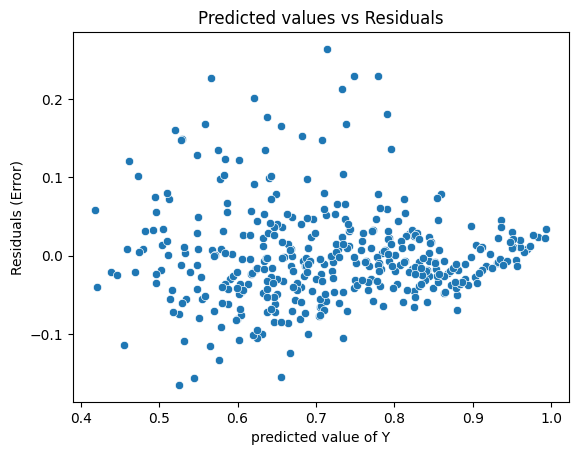

In [334]:
#Plotting the residual vs predicted value
sns.scatterplot(x=Y_hat,y=errors)
plt.xlabel("predicted value of Y")
plt.ylabel("Residuals (Error)")
plt.title("Predicted values vs Residuals")
plt.show()

### **Using Goldfeld Quandt Test to check homoskedacity**

In [335]:
# Goldfeld-Quandt test to check for Homoscedasticity -
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(Y_sm, X_sm_updated)
lzip(name, test)

[('F statistic', 0.8854891359582232), ('p-value', 0.8011121197287425)]

### **Observation:**

We observe **no** specific **pattern** in the residual plot. Its **not increasing** with the Y value.
Also, **P-value = 0.8854891359582232** for Goldfeld-Quandt test. Using significance level of **Alpha = 0.05**, we can easily **accept the null hypothesis** of homoscedasticity, and conclude that there is **no strong evidence of heteroscedasticity** in the data.



## **v. Normality of residuals**

In [336]:
# Errors
model = sm.OLS(Y_sm, X_sm_updated).fit()
Y_hat = model.predict(X_sm_updated)
errors = Y_hat - Y_sm

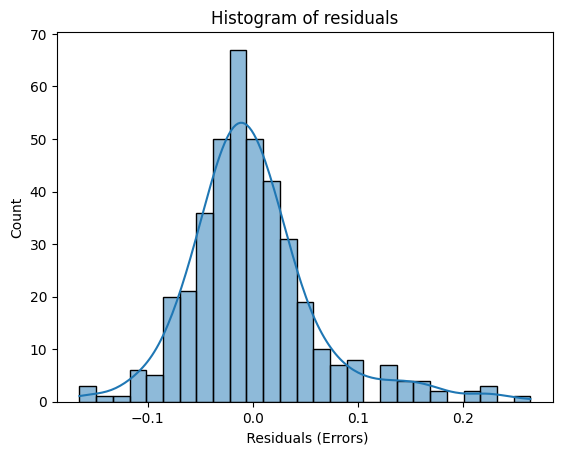

In [337]:
#Plotting Errors/residuls
sns.histplot(errors, kde=True)
plt.xlabel(" Residuals (Errors)")
plt.title("Histogram of residuals")
plt.show()

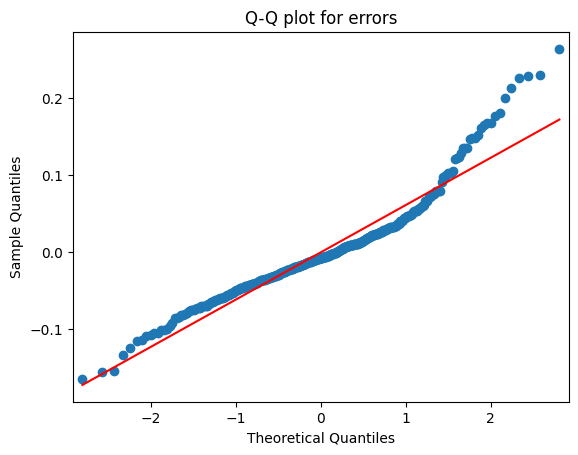

In [338]:
# Verification usin Q-Q-Plot
from statsmodels.graphics.gofplots import qqplot
qqplot(errors, line="s")
plt.title("Q-Q plot for errors")
plt.show()

### **Observation:**

We observe **almost bell-shaped** curve in residuals distribution.
Points in the **Q-Q plot** are **almost all on the line** except few at the end.
So, we can safely conclude the normality of residuals i.e. **residuals are normally distributed**.


# **5. Evaluating Model's Performance.**

In [339]:
# Importing all metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Training Model
model = sm.OLS(Y_sm, X_sm_updated).fit()


### **Performace on Train data**

In [340]:
Y_hat = model.predict(X_sm_updated)
# MAE
mae = mean_absolute_error(Y_sm, Y_hat)

# RMSE
rmse = np.sqrt(mean_squared_error(Y_sm, Y_hat))

# R2 Score
r2 = r2_score(Y_sm, Y_hat)

# Adjusted R²
n = len(Y_sm)  # number of data points
p = X_sm_updated.shape[1]   # number of features (predictors)
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")
print(f"Adjusted R²: {adjusted_r2}")

MAE: 0.043648628633126074
RMSE: 0.06134697067558277
R²: 0.8181818009575201
Adjusted R²: 0.8154059505904594


### **Performace on Test data**

In [341]:
Y_hat = model.predict(X_sm_test_updated)
# MAE
mae = mean_absolute_error(Y_sm_test, Y_hat)

# RMSE
rmse = np.sqrt(mean_squared_error(Y_sm_test, Y_hat))

# R2 Score
r2 = r2_score(Y_sm_test, Y_hat)

# Adjusted R²
n = len(Y_sm_test)  # number of data points
p = X_sm_test_updated.shape[1]   # number of features (predictors)
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")
print(f"Adjusted R²: {adjusted_r2}")

MAE: 0.05957422867945418
RMSE: 0.0715629540173617
R²: 0.6852987369140036
Adjusted R²: 0.6649954296181328


### **Observation:**

Our model's performance is better on train data compared to the Test data

**On Train Data:**
R²: 0.8181818009575201
Adjusted R²: 0.8154059505904594

**On Test Data:**
R²: 0.6852987369140036
Adjusted R²: 0.6649954296181328


# **6. Trying different Models. (Lasso, Ridge)**

In [342]:
# Importing Model
from sklearn.linear_model import Lasso, Ridge

## **i. Lasso**

In [343]:
# Initializing model with hyperparameter alpha 0.005
lasso_model = Lasso(alpha=0.005)

In [344]:
# Training Model
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.005)

In [345]:
lasso_predictions = lasso_model.predict(X_test)

In [346]:
#Performance

# MAE
mae = mean_absolute_error(y_test, lasso_predictions)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, lasso_predictions))

# R2 Score
r2 = r2_score(y_test, lasso_predictions)

# Adjusted R²
n = len(y_test)  # number of data points
p = X_test.shape[1]   # number of features (predictors)
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")
print(f"Adjusted R²: {adjusted_r2}")

MAE: 0.0541268088964153
RMSE: 0.06368786125013934
R²: 0.7507499254539467
Adjusted R²: 0.7317852458689209


## **ii. Ridge**

In [347]:
# Initializing model with hyperparameter alpha 20.0
ridge_model = Ridge(alpha=20.0)

In [348]:
# Training Model
ridge_model.fit(X_train, y_train)

Ridge(alpha=20.0)

In [349]:
ridge_predictions = ridge_model.predict(X_test)

In [350]:
#Performance

# MAE
mae = mean_absolute_error(y_test, ridge_predictions)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))

# R2 Score
r2 = r2_score(y_test, ridge_predictions)

# Adjusted R²
n = len(y_test)  # number of data points
p = X_test.shape[1]   # number of features (predictors)
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")
print(f"Adjusted R²: {adjusted_r2}")

MAE: 0.05197665484990663
RMSE: 0.062119238772603544
R²: 0.7628767069622414
Adjusted R²: 0.744834717274586


### **Observation:**

Using both Lasso and Ridge regularization with proper alpha value has significantly **improved our Model's performance** on **Test data** which was cause of concern in unregularized Model.

**Without Lasso and Ridge:**
R²: 0.6852987369140036
Adjusted R²: 0.6649954296181328

**With Lasso:**
R²: 0.7507499254539467
Adjusted R²: 0.7317852458689209

**With Ridge:**
R²: 0.7628767069622414
Adjusted R²: 0.744834717274586


# **7. Insights & Recommendations**

1. Although with varying degree in general there appears to be a linear **positive corelation** between 'GRE Score', 'TOEFL Score' and 'CGPA' with 'Chance of Admit'. Thus improving them will **improve** students **chance** of admission into Ivy League colleges.

2. In general, higher value of 'University Rating', 'SOP' and 'LOR' results in **higher probability** of getting admission.

3. Mean value of 'Chance of Admit' is higher for applicants having research experience indicating having research experience will **increase** your probability if getting admission into Ivy League colleges.

4. All independent variable has some sort of **positive Correlation** with each other and the dependent variable.

5. Coefficient of **University Rating** and **SOP** were statistically **insignificant** in our trained Statsmodel. Dropping them did not affect the Model's performance.

6. Using both **Lasso and Ridge** regularization with proper alpha value significantly **improved our Model's performance** on **Test data** which was cause of concern in unregularized Model. Thus, Jamboree should use either Lasso or Ridge Model for deployment on their website.
